In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine_df = pd.read_csv("./data/Wine/Wine.csv")
wine_df.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


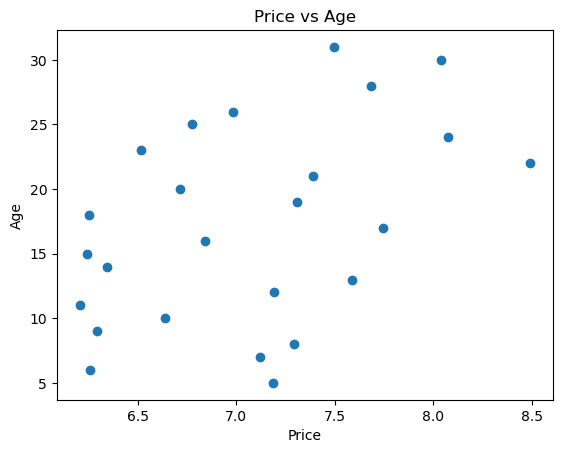

In [6]:
plt.scatter(wine_df['Price'], wine_df['Age']) 
plt.title('Price vs Age')
plt.xlabel('Price')
plt.ylabel('Age')
plt.show()

## Single Variable Linear Regression

In [8]:
import statsmodels.formula.api as smf
linear_regression_model_1 = smf.ols('Price ~ AGST', data=wine_df)
linear_regression_model_1_results = linear_regression_model_1.fit()
print(linear_regression_model_1_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     17.71
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           0.000335
Time:                        14:37:37   Log-Likelihood:                -17.070
No. Observations:                  25   AIC:                             38.14
Df Residuals:                      23   BIC:                             40.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4178      2.494     -1.371      0.1

ols = Ordinary Least Square

Summary of Significant Values:
- AGST is significant with a p-value of 0.000.
- The overall model is significant based on the F-statistic (p = 0.000335).
- The intercept is not significant.
These results suggest that AGST significantly affects the Price, but the intercept (constant term) does not.

## Multi Variable Linear Regression

In [12]:
linear_regression_model_2 = smf.ols('Price ~ AGST + HarvestRain + WinterRain + Age + FrancePop', data=wine_df)
linear_regression_model_2_results = linear_regression_model_2.fit()
print(linear_regression_model_2_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     18.47
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           1.04e-06
Time:                        15:14:43   Log-Likelihood:                -2.1043
No. Observations:                  25   AIC:                             16.21
Df Residuals:                      19   BIC:                             23.52
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.4504     10.189     -0.044      

In [14]:
wine_df.corr()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
Year,1.000000,-0.447768,0.016970,-0.246916,0.028009,-1.000000,0.994485
Price,-0.447768,1.000000,0.136651,0.659563,-0.563322,0.447768,-0.466862
WinterRain,0.016970,0.136651,1.000000,-0.321091,-0.275441,-0.016970,-0.001622
AGST,-0.246916,0.659563,-0.321091,1.000000,-0.064496,0.246916,-0.259162
HarvestRain,0.028009,-0.563322,-0.275441,-0.064496,1.000000,-0.028009,0.041264
Age,-1.000000,0.447768,-0.016970,0.246916,-0.028009,1.000000,-0.994485
FrancePop,0.994485,-0.466862,-0.001622,-0.259162,0.041264,-0.994485,1.000000
